page 21

next: explore bend radius, hypothesis = wider bend -> better dispersion -> better resolution if magnitude can be held low

p_bend_radius = 0.25
p_bend_angle = 100.0
p_drift_post_aperture = 0.001647845131336711
p_drift_pre_bend = 0.08264476762309475
p_drift_post_bend = 0.07893060501596277
p_drift_pre_hodoscope = [fit]
p_m5a_length = 0.06981600194372625
p_m5a_quad = 0.4
p_m5b_length = 0.06928842409139782
p_m5b_quad = 0.1179451296465932
p_shape_in_1 = -0.1249745550920304
p_shape_out_1 = -0.10147496294559

Magnification: -0.7075923682210754
Focus: -5.365359545539405e-09
Dispersion: 0.5186298858380054
Resolution: 0.027286987793915626


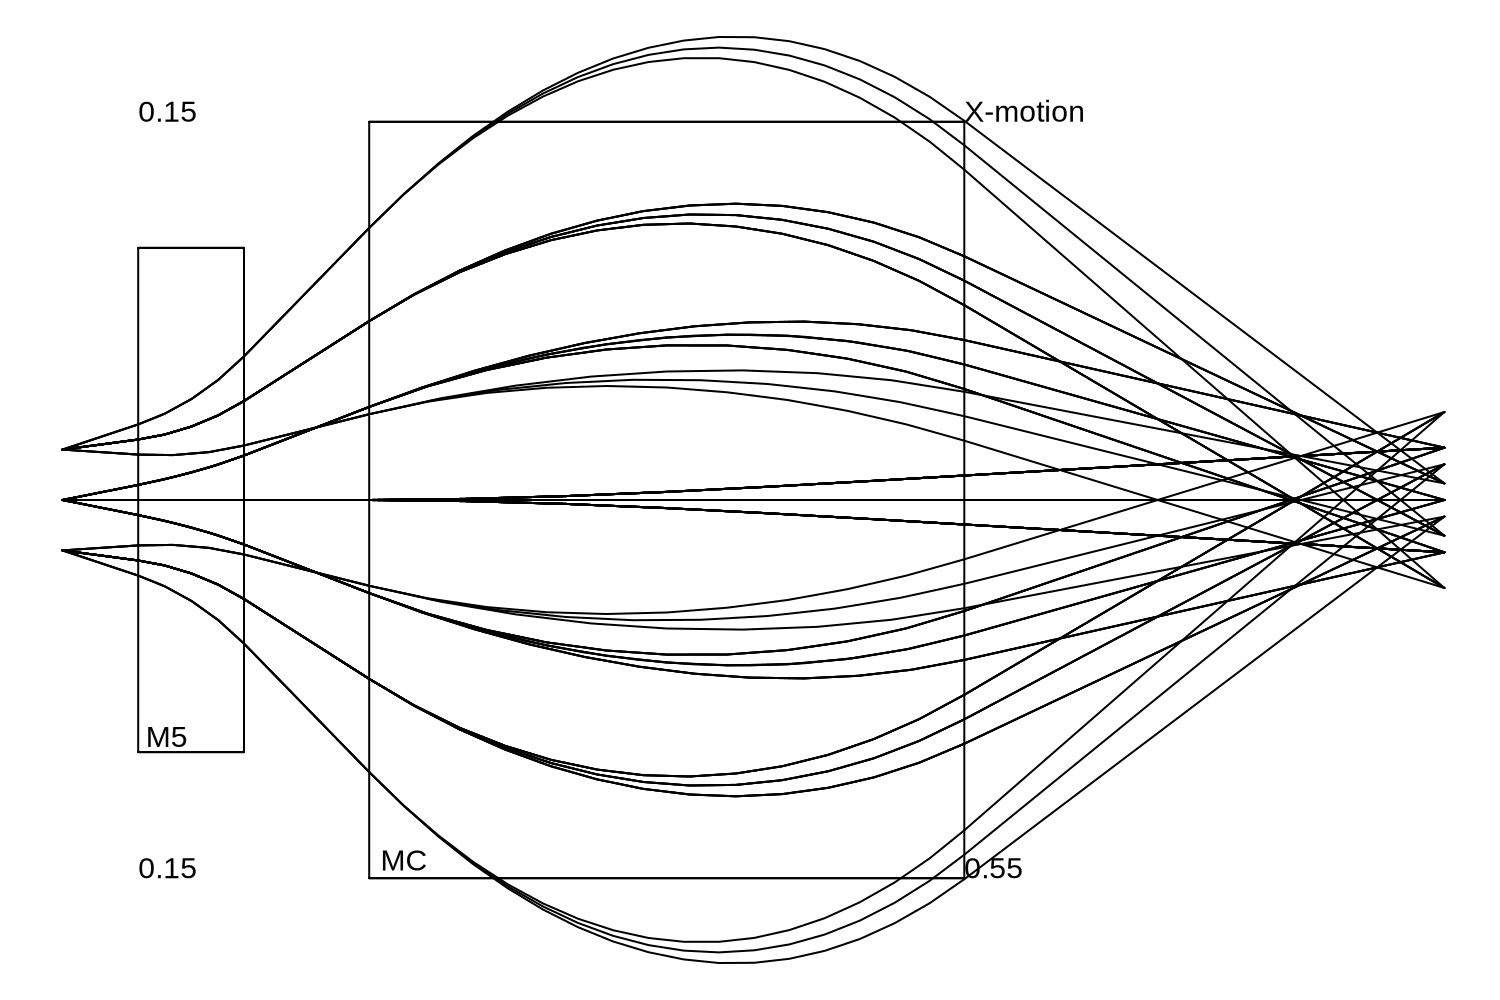

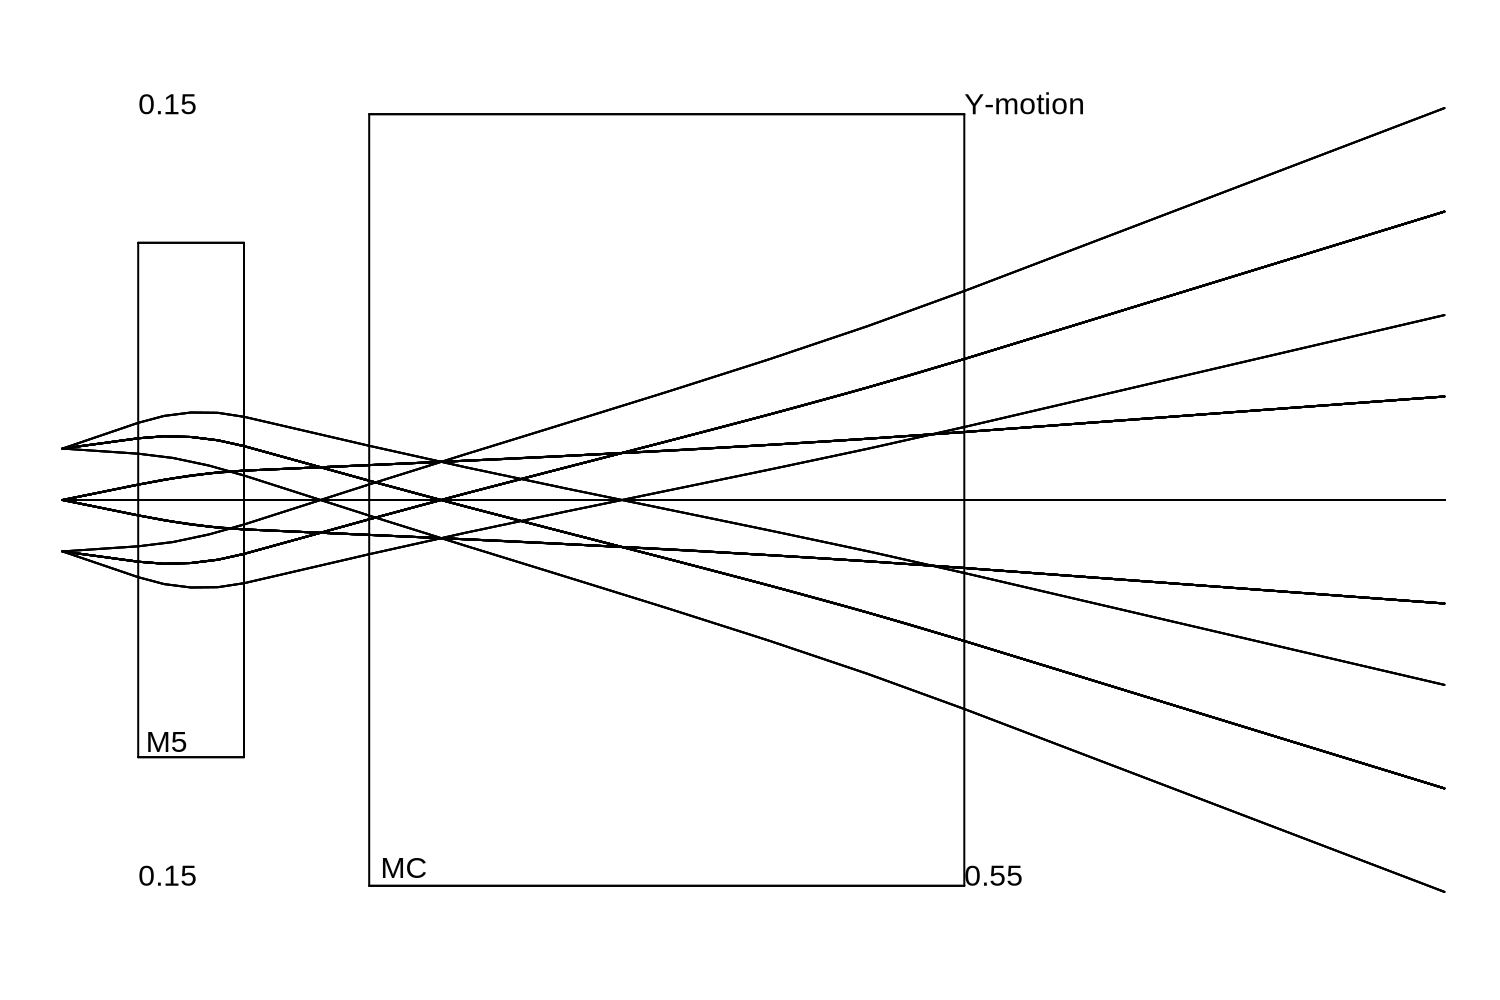

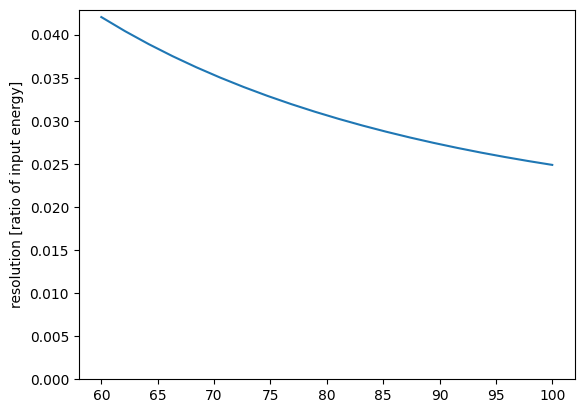

In [47]:
from mrs_ion_optics import gen_charictaristic_rays, MRSIonOptics
import mrs_ion_optics as K
from IPython.core.display import SVG, display_svg
import numpy as np
import matplotlib.pyplot as plt

R_FOIL = 0.015
L_DRIFT = 0.25
R_APERTURE = 0.01

sess = (
    MRSIonOptics()
    .set_parameter(K.K_p_m5a_quad, 0.4)
    # .set_parameter(K.K_p_m5a_length, 0.05)
    # .set_parameter(K.K_p_drift_pre_bend, 0.05)
    # .set_parameter(K.K_p_drift_post_bend, 0.05)
    # .set_parameter(K.K_p_m5b_quad, -0.03)
    # .set_parameter(K.K_p_m5b_length, 0.2)
    # .set_parameter(K.K_p_bend_angle, 90)
    .set_parameter(K.K_p_bend_radius, 0.25)
    .config_fit([K.K_p_drift_pre_hodoscope])
    .config_order(1)
    .config_vis_lab_coordinates(False)
    .config_outputs(["ME(1,1)","ME(1,2)","ME(1,6)"])
    .set_rays(gen_charictaristic_rays(R_FOIL, L_DRIFT, R_APERTURE, n=3), color=6)
    .add_rays(gen_charictaristic_rays(R_FOIL, L_DRIFT, R_APERTURE, n=3,energy=-0.02), color=3)
    .add_rays(gen_charictaristic_rays(R_FOIL, L_DRIFT, R_APERTURE, n=3,energy=0.02), color=2)
)

# X = np.linspace(-0.25,0.5,20)
# V = np.array([sess.set_parameter(K.K_p_m5a_quad,x).exec()[1] for x in X])
# X = np.linspace(0.05,0.8,20)
# V = np.array([sess.set_parameter(K.K_p_bend_radius,x).exec()[1] for x in X])
X = np.linspace(60,100,20)
V = np.array([sess.set_parameter(K.K_p_bend_angle,x).exec()[1] for x in X])
plt.plot(X, np.abs(2*R_APERTURE*V[:, 0] / V[:, 2]))
plt.ylim(bottom = 0)
plt.ylabel("resolution [ratio of input energy]")

sess.print_params()
print()

# outputs, _ = sess.set_parameter(K.K_p_m5a_quad, 0.4).exec_fit()
# outputs, _ = sess.set_parameter(K.K_p_bend_radius, 0.25).exec_fit()
outputs, _ = sess.set_parameter(K.K_p_bend_angle, 90).exec_fit()
print("Magnification:", outputs[0])
print("Focus:", outputs[1])
print("Dispersion:", outputs[2])
print("Resolution:", abs(2 * R_APERTURE * outputs[0] / outputs[2]))
for svg_data in sess.exec_svg():
    display_svg(SVG(data=svg_data))

[15:33:30]  optimization:  1.82%  1.2s/66.2s  ETA: 15:34:35 [T-65.0s]
[15:33:33]  optimization:  5.45%  3.4s/62.1s  ETA: 15:34:31 [T-58.7s]
[15:33:36]  optimization:  10.91%  6.7s/61.1s  ETA: 15:34:30 [T-54.4s]
[15:33:40]  optimization:  18.18%  11.1s/60.9s  ETA: 15:34:30 [T-49.8s]
[15:33:45]  optimization:  27.27%  16.3s/59.8s  ETA: 15:34:29 [T-43.5s]
[15:33:54]  optimization:  41.82%  24.6s/58.9s  ETA: 15:34:28 [T-34.3s]
[15:34:06]  optimization:  61.82%  36.4s/58.9s  ETA: 15:34:28 [T-22.5s]
[15:34:23]  optimization:  92.73%  54.3s/58.6s  ETA: 15:34:28 [T-4.3s]
[15:34:28]  optimization complete in 58.455s
p_bend_radius = 0.2021197079306207
p_bend_angle = 93.884579505768
p_drift_post_aperture = 0.08462375000000001
p_drift_pre_bend = 0.06749999999999998
p_drift_post_bend = 0.08412499999999999
p_drift_pre_hodoscope = [fit]
p_m5a_length = 0.1035625
p_m5a_quad = 0.2803780028644797
p_m5b_length = 0.07918750000000001
p_m5b_quad = 0.1179451296465932
p_shape_in_1 = -0.125
p_shape_out_1 = -0.1

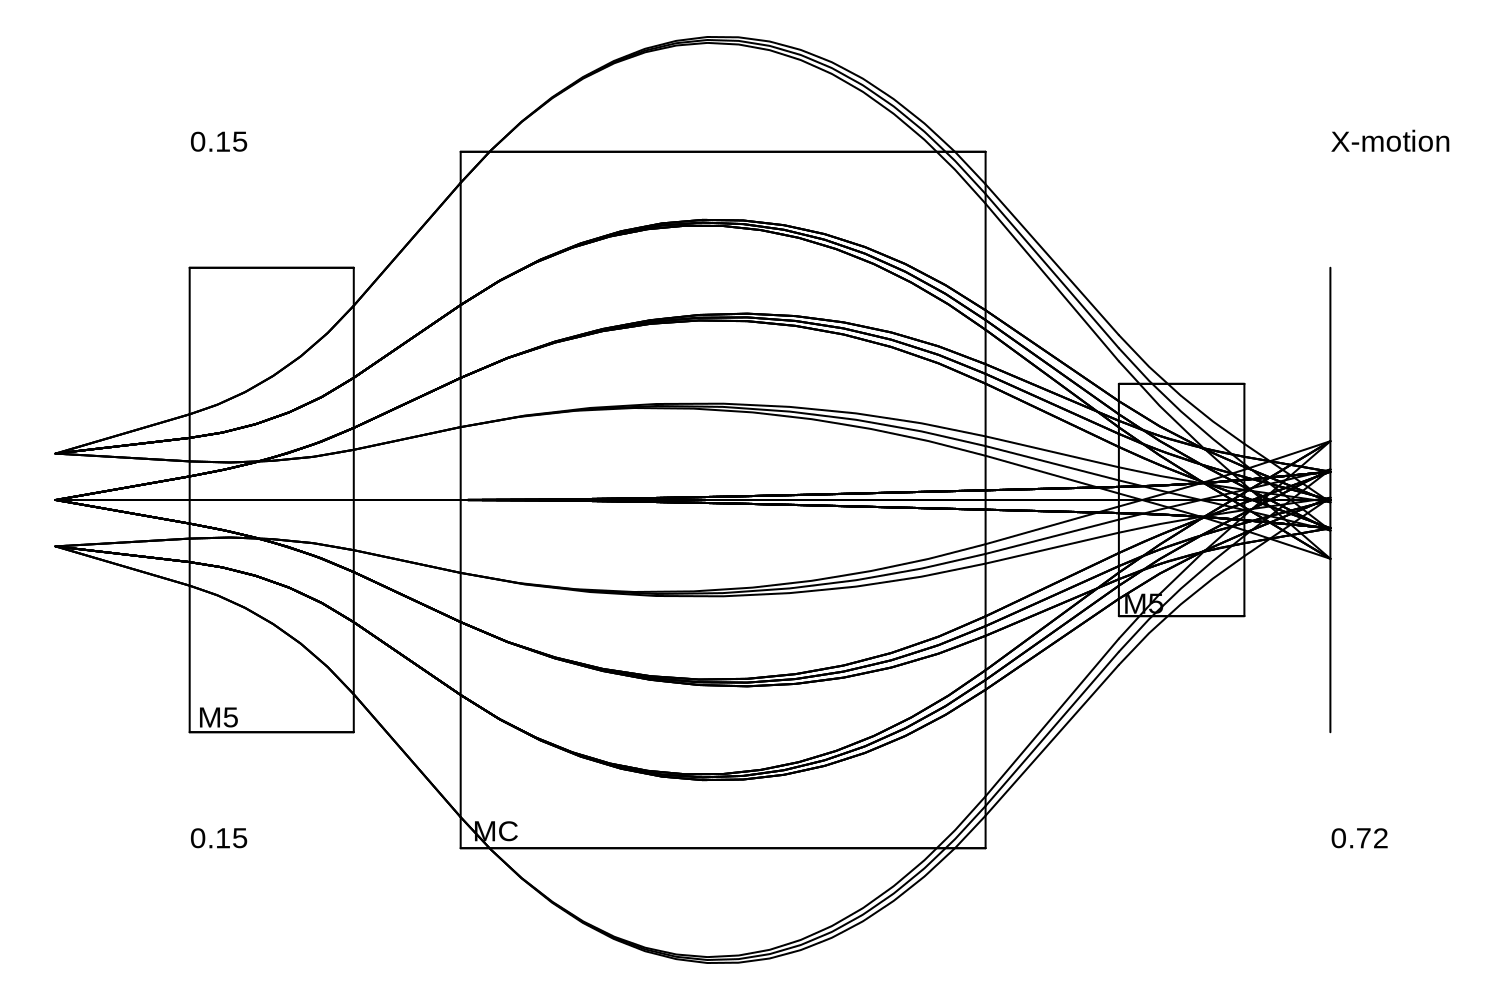

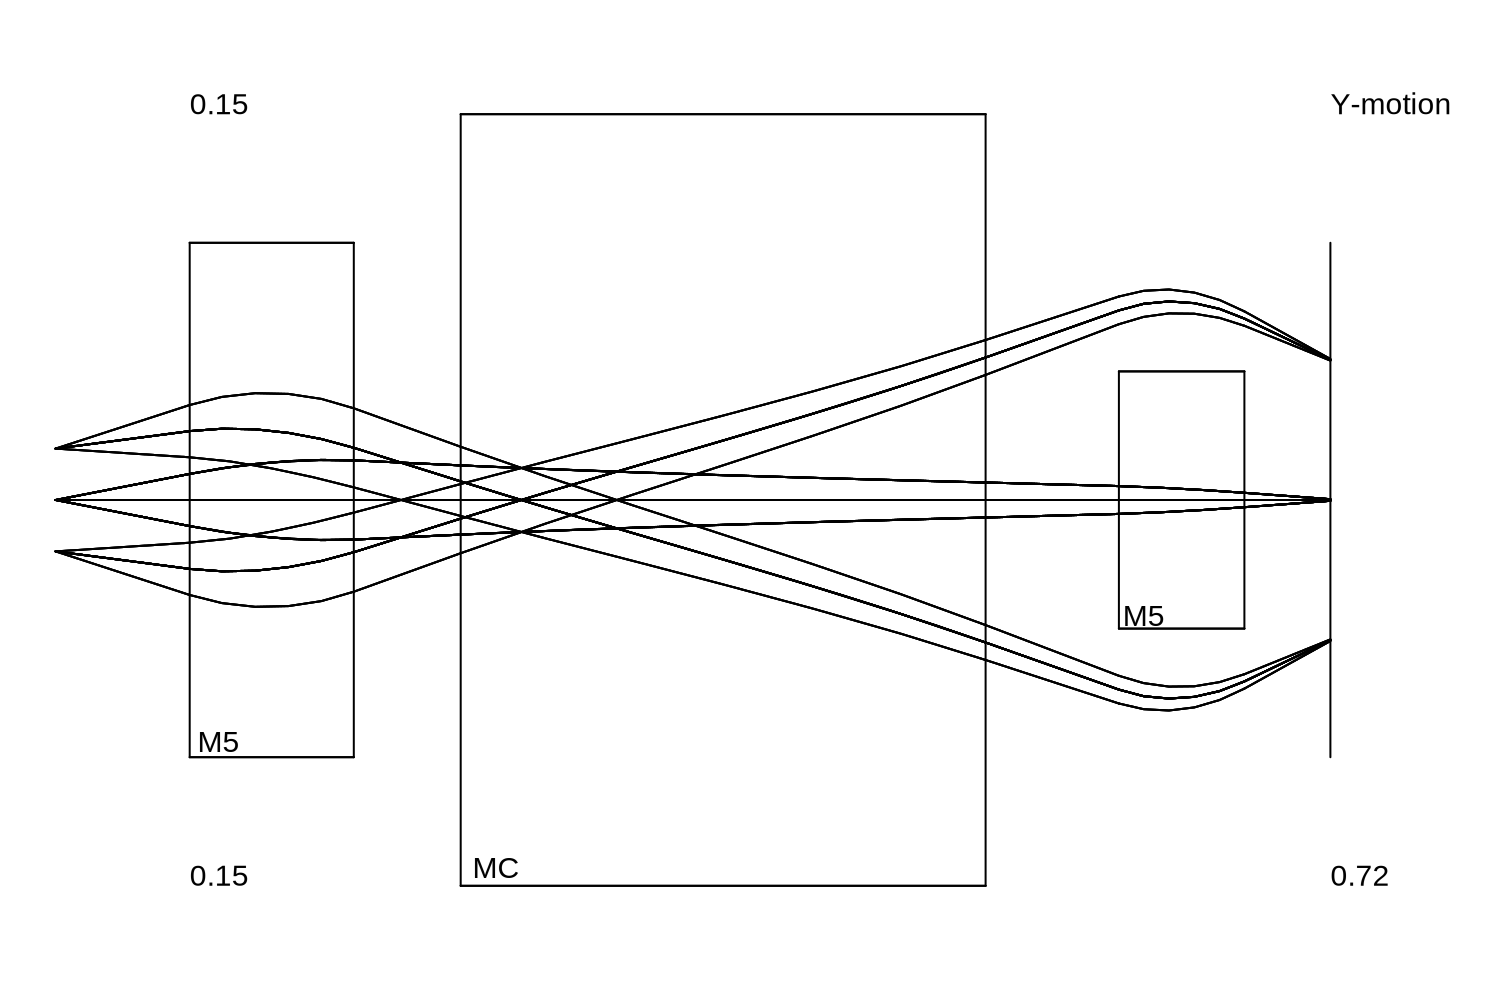

In [ ]:
from mrs_ion_optics import gen_charictaristic_rays, MRSIonOptics
import mrs_ion_optics as K
from IPython.core.display import SVG, display_svg
import numpy as np
import matplotlib.pyplot as plt
from util import begin_timer

R_FOIL = 0.015
L_DRIFT = 0.25
R_APERTURE = 0.01

p_lims = {
    K.K_p_bend_radius: (0.05, 0.25),
    K.K_p_bend_angle: (60.0, 110.0),
    K.K_p_drift_post_aperture: (0.001, 0.4),
    K.K_p_drift_pre_bend: (0.001, 0.4),
    K.K_p_drift_post_bend: (0.001, 0.4),
    K.K_p_m5a_length: (0.05, 0.2),
    K.K_p_m5a_quad: (-0.2, 0.4),
    K.K_p_m5b_length: (0.05, 0.2),
    K.K_p_m5b_quad: (-0.4, 0.4),
    K.K_p_shape_in_1: (-0.25, 0.25),
    K.K_p_shape_out_1: (-0.25, 0.25),
}


	# WV:=;
	# WVY:=(VMAX(RAY(3))-VMIN(RAY(3)))/2;
sess = (
    MRSIonOptics()
    .config_fit([K.K_p_drift_pre_hodoscope])
    .config_order(1)
    .config_vis_lab_coordinates(False)
    .config_outputs([
        # f"ABS({2 * R_APERTURE}*ME(1,1)/ME(1,6))", # resolution as fraction of input energy
        "ME(1,1)", # magnification (dispersive direction)
        "ME(1,2)", # focus (dispersive direction)
        "ME(1,6)", # dispersion (dispersive direction)
        "ME(3,1)", # magnification (vertical direction)
        "ME(3,2)", # focus (vertical direction)
        "(VMAX(RAY(1))-VMIN(RAY(1)))/2", # image size (dispersive direction)
        "(VMAX(RAY(3))-VMIN(RAY(3)))/2", # image size (vertical direction)
    ],do_beamsize=True)
    .set_rays(gen_charictaristic_rays(R_FOIL, L_DRIFT, R_APERTURE, n=3), color=6)
    # .add_rays(gen_charictaristic_rays(R_FOIL, L_DRIFT, R_APERTURE, n=3, energy=-0.02), color=3)
    # .add_rays(gen_charictaristic_rays(R_FOIL, L_DRIFT, R_APERTURE, n=3, energy=0.02), color=2)
)

# uncertainties = [1]
# uncertainties = [1,0.3]
# uncertainties = [1,0.1]
uncertainties = [1,0.3,0.1,0.03,0.01]
update_timer = begin_timer("optimization")
i = 0
n = len(uncertainties) * len(p_lims)
for uncertainty in uncertainties:
# for uncertainty in [1,0.3,0.1,0.03,0.01]:
# for uncertainty in [1]:
    for k in p_lims.keys():
        p_lim = p_lims[k]
        X = (
            np.linspace(-0.5, 0.5, 25) * uncertainty * (p_lim[1] - p_lim[0])
            + sess.parameter_values[k]
        )
        X += np.clip(p_lim[0] - X[0], a_min=0, a_max=None)
        X += np.clip(p_lim[-1] - X[1], a_min=None, a_max=0)
        # X += np.clip(p_lim[0] - X[0], a_min=None, a_max=0)
        # X += np.clip(p_lim[-1] - X[1], a_min=0, a_max=None)
        R = [sess.set_parameter(k, x).exec() for x in X]
        (
            # V_resolution,
            V_magnification,
            V_focus,
            V_dispersion,
            V_magnification_y,
            V_focus_y,
            V_imagesize_x,
            V_imagesize_y,
        ) = np.transpose([r[1] for r in R])
        V_beam_widths = np.array([r[3] for r in R]) # [X.size, 6]
        # V_resolution = np.abs(2*R_APERTURE*V_magnification / V_dispersion)
        V_resolution = V_imagesize_x/V_dispersion
        sess.set_parameter(k,X[np.argmin(
            np.max(np.abs([
                V_resolution*500,
                V_focus*100,
                V_magnification*10.0,
                (np.abs(V_imagesize_x)-0.0025)*200,
                4/V_dispersion,
                # V_imagesize_y*4.0,
                # V_focus_y+V_magnification_y,
            ]),axis=0)+(
                np.sum(np.clip(np.abs(V_beam_widths)-0.020,a_min=0,a_max=None),axis=1)[:,0]*20
                + np.sum(np.clip(np.abs(V_beam_widths)-0.005,a_min=0,a_max=None),axis=1)[:,1]*5
            ))])


        i += 1
        update_timer(i/n)


(
    # V_resolution,
    V_magnification,
    V_focus,
    V_dispersion,
    V_magnification_y,
    V_focus_y,
    # V_yarg,
    V_imagesize_x,
    V_imagesize_y,
), _, _ = sess.exec_fit()
V_resolution = np.abs(2 * R_APERTURE * V_magnification / V_dispersion)
# V_resolution = V_imagesize_x/V_dispersion
sess.print_params()
print()
print("Magnification:", V_magnification)
print("Focus:", V_focus)
# print("Dispersion:", V_dispersion)
print("Resolution:", V_resolution)
for svg_data in (sess
        .add_rays(gen_charictaristic_rays(R_FOIL, L_DRIFT, R_APERTURE, n=3, energy=-0.01), color=3)
        .add_rays(gen_charictaristic_rays(R_FOIL, L_DRIFT, R_APERTURE, n=3, energy=0.01), color=2)
        .exec_svg()
):
    display_svg(SVG(data=svg_data))

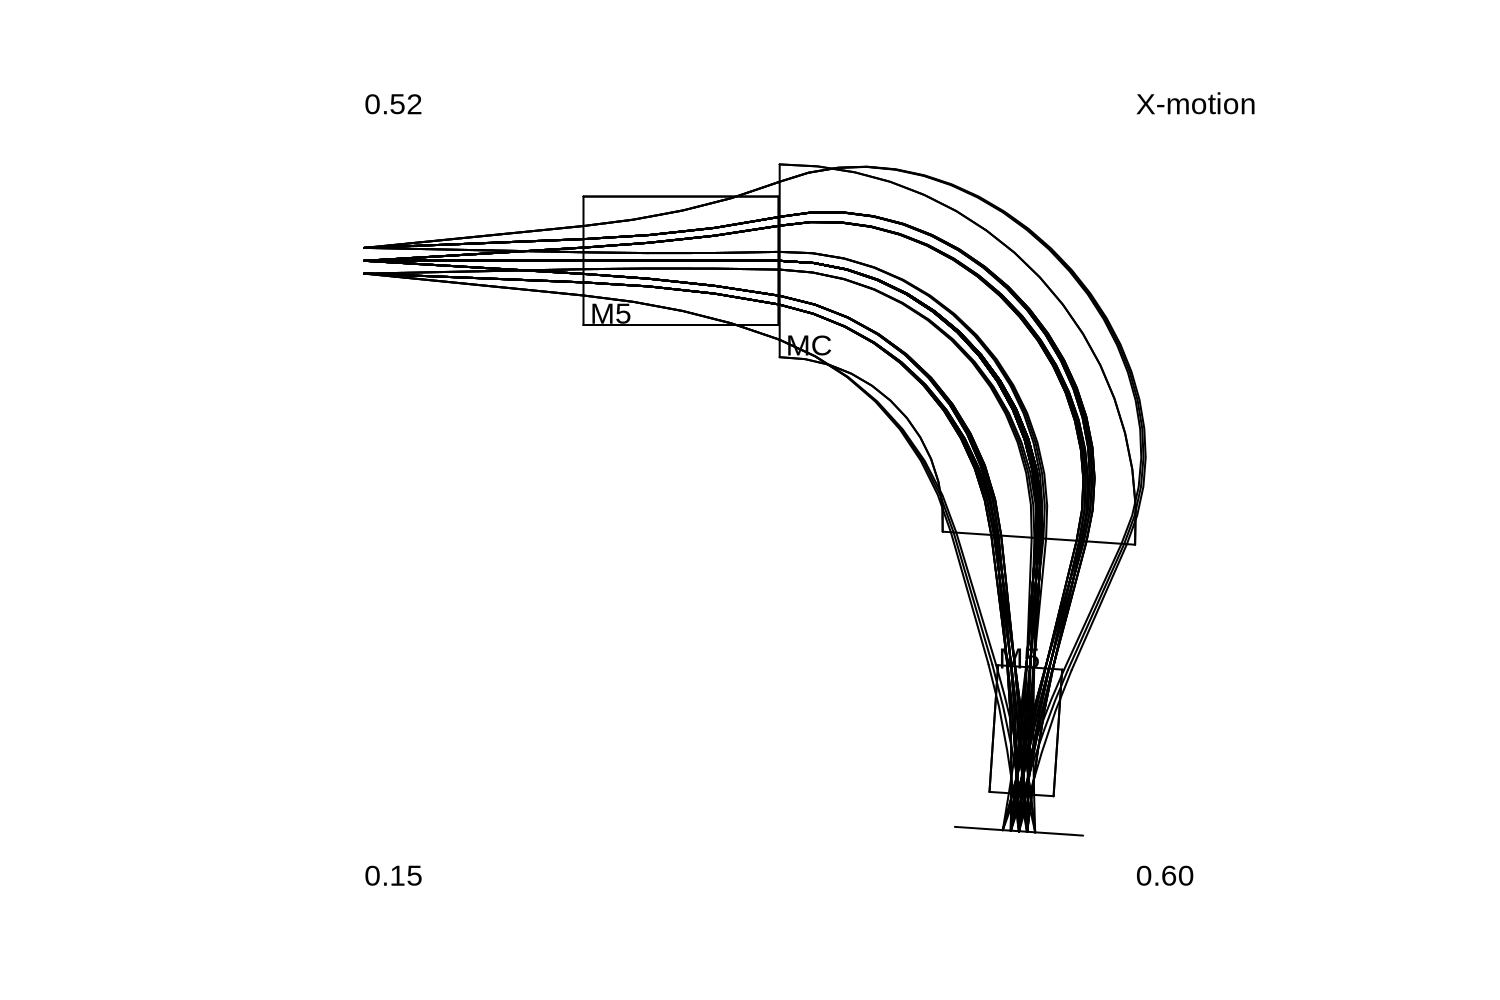

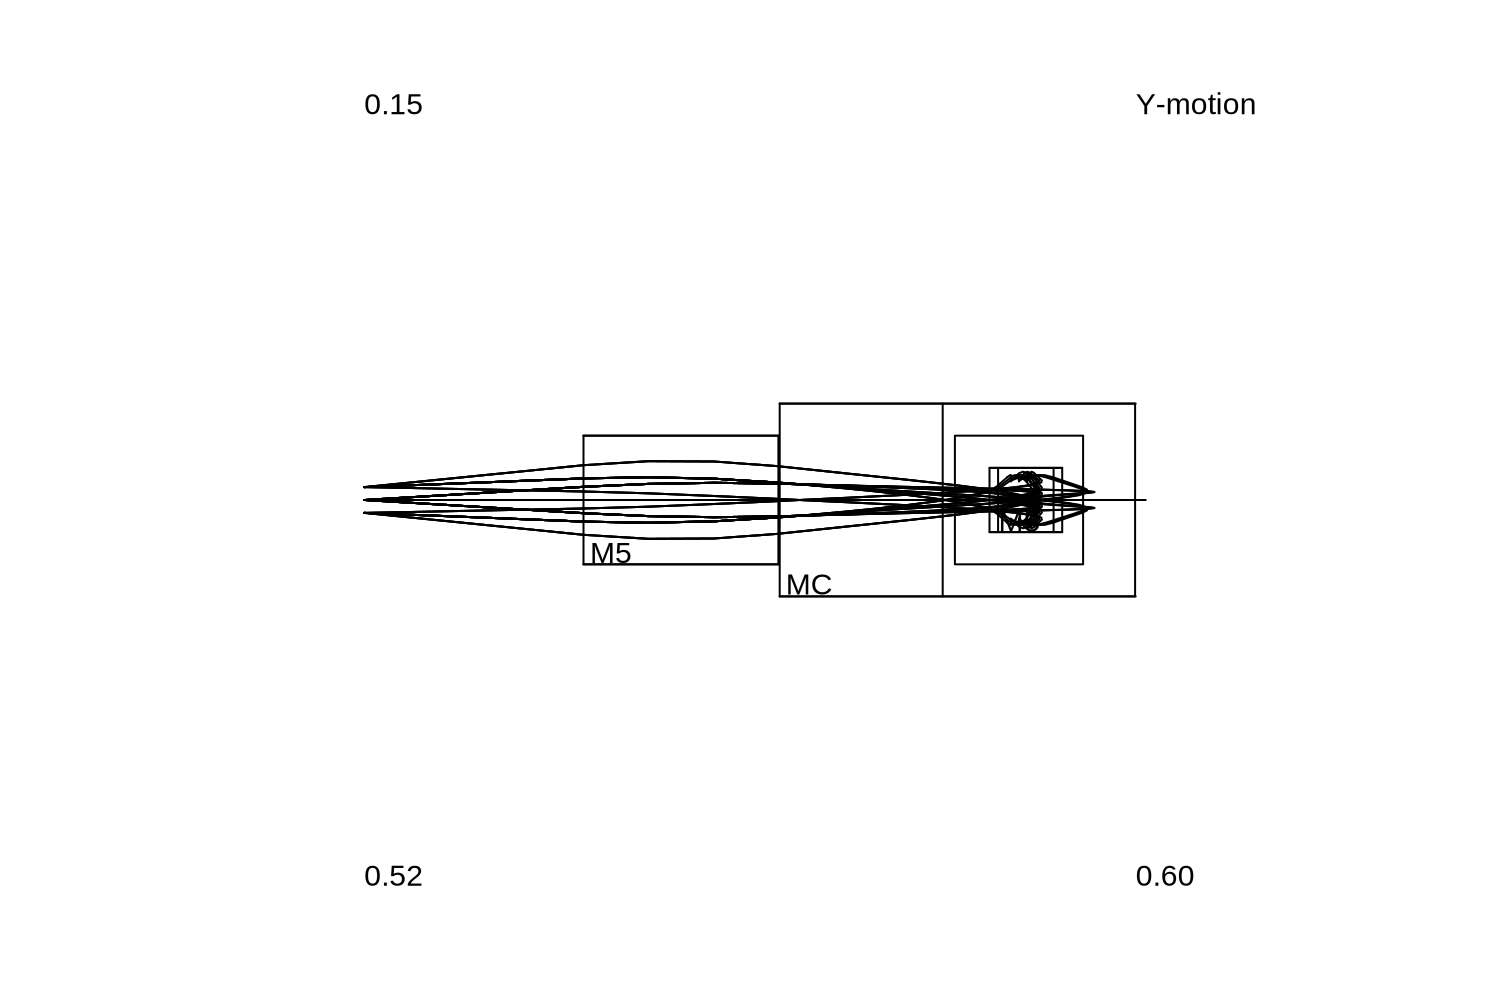

In [35]:

for svg_data in sess.config_vis_lab_coordinates(True).exec_svg():
    display_svg(SVG(data=svg_data))

In [4]:
import numpy as np
r1, r2 = zip(*([x,[x,2,4]] for x in [1,2,3]))
np.array(r1), np.array(r2)

(array([1, 2, 3]),
 array([[1, 2, 4],
        [2, 2, 4],
        [3, 2, 4]]))